# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Netania Pangalinan]
- **Email:** [netaniapangalinan@gmail.com]
- **ID Dicoding:** [netania]

## Menentukan Pertanyaan Bisnis

- Apakah jumlah penggunaan sepeda meningkat atau menurun dari tahun ke tahun?
- Apakah ada penggunaan sepeda yang berbeda pada hari kerja dibandingkan akhir pekan?
- Musim apa yang paling ramai atau sepi dalam hal penggunaan sepeda?
- Berapa besar kontribusi pengguna kasual dibandingkan dengan pengguna terdaftar pada hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

**Memuat data day_df dan hour_df**

In [2]:
#load day_csv
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#load hour_csv
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Assesing day_df**

In [4]:
#Memeriksa tipe data dari day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat satu kolom yang memiliki tipe data yang salah, yaitu kolom 'dteday' yang bertipe data 'object', padahal seharusnya kolom ini memiliki tipe data 'datetime'.

In [5]:
#Memeriksa Tipe Data dari day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak terdapat *missing values* pada setiap kolom

In [6]:
#Memeriksa nilai duplikat pada day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi pada masing-masing kolom

In [7]:
#Menampilkan Ringkasan Parameter Statistik pada day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat masalah pada parameter statistiknya

**Assesing hour_df**

In [8]:
#Memeriksa tipe data dari hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat satu kolom yang memiliki tipe data yang salah, yaitu kolom 'dteday' yang bertipe data 'object', padahal seharusnya kolom ini memiliki tipe data 'datetime'.

In [9]:
#Memeriksa nilai yang hilang dari hour_df
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak terdapat *missing values* pada masing-masing kolom

In [10]:
#Memeriksa nilai duplikasi dari hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat nilai yang duplikat

In [11]:
#Menampilkan Parameter Statistik Ringkasan dari hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat masalah pada parameter statistiknya

### Cleaning Data

In [12]:
#Menghapus kolom yang tidak diperlukan ('instant' dan 'windspeed') karena tidak relevan dengan pertanyaan bisnis
if 'instant' in day_df.columns:
    day_df = day_df.drop(columns=['instant'])
if 'windspeed' in day_df.columns:
    day_df = day_df.drop(columns=['windspeed'])
if 'instant' in hour_df.columns:
    hour_df = hour_df.drop(columns=['instant'])
if 'windspeed' in hour_df.columns:
    hour_df = hour_df.drop(columns=['windspeed'])

In [13]:
#Mengubah nama kolom yang tersisa agar mudah dibaca
day_df.columns = ['date', 'season', 'year', 'month', 'is_holiday', 'weekday',
                  'is_workingday', 'weather_situation', 'temperature',
                  'feels_like_temp', 'humidity', 'casual_users', 'registered_users', 'total_users']

hour_df.columns = ['date', 'season', 'year', 'month', 'hour', 'is_holiday', 'weekday',
                   'is_workingday', 'weather_situation', 'temperature',
                   'feels_like_temp', 'humidity', 'casual_users', 'registered_users', 'total_users']

In [14]:
#Mengubah kolom tanggal menjadi format 'datetime' untuk memudahkan analisis deret waktu
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [15]:
#Mengekstrak nama hari dan tahun dari 'date'
day_df['weekday'] = day_df['date'].dt.day_name()
day_df['year'] = day_df['date'].dt.year
hour_df['weekday'] = hour_df['date'].dt.day_name()
hour_df['year'] = hour_df['date'].dt.year

In [16]:
#Mengonversi tipe data kolom menjadi kategori
hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')

#Mengganti 'holiday' dengan nama kolom yang mewakili hari libur, yaitu 'is_holiday'
hour_df['is_holiday'] = hour_df['is_holiday'].astype('category')
hour_df['is_workingday'] = hour_df['is_workingday'].astype('category')

#Mengganti 'weather' dengan nama kolom yang sebenarnya untuk cuaca, yaitu 'weather_situation'
hour_df['weather_situation'] = hour_df['weather_situation'].astype('category')

In [17]:
#Memastikan kolom numerik berada dalam tipe data yang benar
numeric_columns_day = ['temperature', 'feels_like_temp', 'humidity', 'casual_users', 'registered_users', 'total_users']
numeric_columns_hour = numeric_columns_day + ['hour']

day_df[numeric_columns_day] = day_df[numeric_columns_day].apply(pd.to_numeric, errors='coerce')
hour_df[numeric_columns_hour] = hour_df[numeric_columns_hour].apply(pd.to_numeric, errors='coerce')

In [18]:
# Memetakan nilai numerik ke label deskriptif untuk 'season' dan 'weather_situation'
#Mapping season kolom
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}

#mapping kolom bulan
mapping_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
}

day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)

day_df['month'] = day_df['month'].map(mapping_month)
hour_df['month'] = hour_df['month'].map(mapping_month)

In [19]:
#Menampilkan beberapa baris pertama untuk memverifikasi perubahan
day_df.head(), hour_df.head()

(        date  season  year month  is_holiday    weekday  is_workingday  \
 0 2011-01-01  Spring  2011   Jan           0   Saturday              0   
 1 2011-01-02  Spring  2011   Jan           0     Sunday              0   
 2 2011-01-03  Spring  2011   Jan           0     Monday              1   
 3 2011-01-04  Spring  2011   Jan           0    Tuesday              1   
 4 2011-01-05  Spring  2011   Jan           0  Wednesday              1   
 
      weather_situation  temperature  feels_like_temp  humidity  casual_users  \
 0         Misty/Cloudy     0.344167         0.363625  0.805833           331   
 1         Misty/Cloudy     0.363478         0.353739  0.696087           131   
 2  Clear/Partly Cloudy     0.196364         0.189405  0.437273           120   
 3  Clear/Partly Cloudy     0.200000         0.212122  0.590435           108   
 4  Clear/Partly Cloudy     0.226957         0.229270  0.436957            82   
 
    registered_users  total_users  
 0               654    

In [20]:
day_df.head()

,date,season,year,month,is_holiday,weekday,is_workingday,weather_situation,temperature,feels_like_temp,humidity,casual_users,registered_users,total_users
0,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [21]:
hour_df.head()

,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_situation,temperature,feels_like_temp,humidity,casual_users,registered_users,total_users
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0,1,1


In [22]:
day_df.to_csv("all_data", index=False)
hour_df.to_csv("all_data", index=False)

## Exploratory Data Analysis (EDA)

### Explore day_df

**Analisis Penyewa Sepeda Berdasarkan Bulan**

In [23]:
day_df.groupby(by=['year', 'month']).agg({
    'total_users': ['sum', 'max', 'min']
})

total_users            
                   sum   max   min
year month                        
2011 Apr         94870  5312   795
     Aug        136691  5895  1115
     Dec         87323  3940   705
     Feb         48215  2927  1005
     Jan         38189  1985   431
     Jul        141341  6043  3285
     Jun        143512  5515  3767
     Mar         64045  3239   605
     May        135821  5805  2633
     Nov        102167  4486  1495
     Oct        123511  5511   627
     Sep        127418  5423  1842
2012 Apr        174224  7460  1027
     Aug        214503  7865  4549
     Dec        123713  6606   441
     Feb        103137  5062  1529
     Jan         96744  4521  1301
     Jul        203607  8173  4459
     Jun        202830  8120  4127
     Mar        164875  8362  3194
     May        195865  8294  2843
     Nov        152664  6852  2277
     Oct        198841  8156    22
     Sep        218573  8714  4073

In [24]:
#Pengelompokan jumlah penyewaan sepeda berdasarkan bulan
grouped_by_month = day_df.groupby('month')

#Menghitung statistik agregat (jumlah maksimum, minimum, rata-rata, dan total) untuk setiap bulan
aggregated_stats_by_month = grouped_by_month['total_users'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_month

,max,min,mean,sum
month,,,,
Apr,7460,795,4484.900000,269094
Aug,7865,1115,5664.419355,351194
Dec,6606,441,3403.806452,211036
Feb,5062,1005,2655.298246,151352
Jan,4521,431,2176.338710,134933
Jul,8173,3285,5563.677419,344948
Jun,8120,3767,5772.366667,346342
Mar,8362,605,3692.258065,228920
May,8294,2633,5349.774194,331686


Penggunaan sepeda tertinggi terjadi pada bulan Agustus, Juli, dan September, dikarenakan cuaca yang mendukung atau meningkatnya aktivitas luar ruangan di pertengahan hingga akhir tahun. Sebaliknya, penggunaan terendah terjadi di Januari dan Februari, yang mungkin disebabkan oleh cuaca atau minat bersepeda yang lebih rendah di awal tahun.

**Perbandingan Penyewa Sepeda berdasarkan hari libur dan hari kerja**

In [25]:
aggregated_stats = day_df.groupby(['is_holiday', 'is_workingday'])['total_users'].agg(
    total_users='sum', max_rentals='max', min_rentals='min').reset_index()

print("Statistik Penyewaan Sepeda Berdasarkan Hari Libur dan Hari Kerja:")
print(aggregated_stats)

Statistik Penyewaan Sepeda Berdasarkan Hari Libur dan Hari Kerja:
   is_holiday  is_workingday  total_users  max_rentals  min_rentals
0           0              0       921834         8714          605
1           0              1      2292410         8362           22
2           1              0        78435         7403         1000


Analisis diatas menyimpulkan bahwa:
- Penyewaan sepeda paling tinggi terjadi pada hari kerja (is_holiday = 0, is_workingday = 1), yang menunjukkan tingginya penggunaan sepeda sebagai alat transportasi harian.
- Penyewaan pada hari libur (is_holiday = 1) juga ada tetapi cenderung lebih rendah, menunjukkan bahwa sepeda digunakan lebih banyak untuk kebutuhan sehari-hari daripada rekreasi.

**Analisis Penyewaan Sepeda selama perminggu**

In [26]:
#Mengelompokkan data berdasarkan hari dalam seminggu
grouped_by_weekday = day_df.groupby('weekday')

#Menghitung statistik agregat untuk setiap hari kerja
aggregated_stats_by_weekday = grouped_by_weekday['total_users'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_weekday

,max,min,mean,sum
weekday,,,,
Friday,8362,1167,4690.288462,487790
Monday,7525,22,4338.123810,455503
Saturday,8714,627,4550.542857,477807
Sunday,8227,605,4228.828571,444027
Thursday,7804,431,4667.259615,485395
Tuesday,7767,683,4510.663462,469109
Wednesday,8173,441,4548.538462,473048


Secara keseluruhan, Hasil analisis diatas menunjukkan bahwa Jumat dan Sabtu adalah hari-hari dengan permintaan tertinggi untuk penyewaan sepeda, sedangkan Senin menunjukkan permintaan yang sedikit lebih rendah.

**Analisis Penyewaan Berdasarkan Musim**

In [27]:
#Mengelompokkan data berdasarkan musim
grouped_by_season = day_df.groupby('season')
#Menghitung statistik agregat untuk setiap musimnya
aggregated_stats_by_season = grouped_by_season['total_users'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_season

,max,min,mean,sum
season,,,,
Fall,8714,1115,5644.303191,1061129
Spring,7836,431,2604.132597,471348
Summer,8362,795,4992.331522,918589
Winter,8555,22,4728.162921,841613


Hasil analisis diatas menunjukkan bahwa *Fall* (Musim Gugur) memiliki permintaan tertinggi untuk penyewaan sepeda, diikuti oleh *Summer* (Musim Panas) yang juga menunjukkan permintaan yang cukup tinggi. *Spring* (Musim Semi) cenderung menunjukkan penggunaan sepeda yang lebih rendah, sementara *Winter* (Musim Dingin) meskipun permintaannya lebih rendah secara keseluruhan, masih menunjukkan beberapa puncak penggunaan, mungkin dipengaruhi oleh cuaca yang lebih baik pada beberapa hari tertentu.

**Analisis Penyewaan Berdasarkan Cuaca**

In [28]:
#Mengelompokkan data berdasarkan situasi cuaca
grouped_by_weather = day_df.groupby('weather_situation')

#Menghitung statistik agregat untuk setiap situasi cuaca
aggregated_stats_by_weather = grouped_by_weather['total_users'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_weather

,max,min,mean,sum
weather_situation,,,,
Clear/Partly Cloudy,8714,431,4876.786177,2257952
Light Snow/Rain,4639,22,1803.285714,37869
Misty/Cloudy,8362,605,4035.862348,996858


Hasil analisis diatas menunjukkan bahwa *Clear/Partly Cloudy* (Cerah/Separa Berawan) adalah situasi cuaca yang paling mendukung bagi penyewaan sepeda, dengan permintaan yang sangat tinggi. *Misty/Cloudy *(Kabut/Berawan) juga menunjukkan permintaan yang cukup besar meskipun sedikit lebih rendah dibandingkan cuaca cerah. Sebaliknya, *Light Snow/Rain* (Salju/Hujan Ringan) memiliki permintaan yang sangat rendah, yang dapat dipahami karena cuaca tersebut tidak ideal untuk bersepeda.

Explore hour_df

**Analisis Penyewaan Berdasarkan Jam (Hour)**

In [29]:
#Mengelompokkan data per jamnya
grouped_by_hour = hour_df.groupby('hour')

#Menghitung statistik agregat untuk setiap jamnya
aggregated_stats_by_hour = grouped_by_hour['total_users'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_hour

,max,min,mean,sum
hour,,,,
0,283,2,53.898072,39130
1,168,1,33.375691,24164
2,132,1,22.869930,16352
3,79,1,11.727403,8174
4,28,1,6.352941,4428
5,66,1,19.889819,14261
6,213,1,76.044138,55132
7,596,1,212.064649,154171
8,839,5,359.011004,261001


Secara umum, hasil analisis di atas menunjukkan bahwa penggunaan sepeda paling tinggi terjadi pada jam-jam sore dan malam hari, khususnya pada pukul 17:00 dan 18:00, dengan rata-rata penyewaan sebesar 461 dan 425, serta total penyewaan masing-masing sekitar 336.860 dan 309.772. Hal ini menunjukkan bahwa pengguna lebih sering menyewa sepeda pada jam-jam setelah jam kerja. Sebaliknya, penggunaan terendah terjadi pada dini hari, antara pukul 02:00 hingga 05:00, dengan total penyewaan yang jauh lebih rendah, seperti pada pukul 03:00 yang hanya mencapai 8.174.

In [30]:
#Analisis jumah rental tiap jam pada hari kerja
filter_working_day = hour_df['is_workingday'] == 1
working_day_df = hour_df[filter_working_day]

grouped_by_hour = working_day_df.groupby('hour')
aggregated_stats_by_hour = grouped_by_hour['total_users'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_hour

,max,min,mean,sum
hour,,,,
0,283,2,36.786290,18246
1,114,1,16.552632,8177
2,74,1,8.683778,4229
3,36,1,4.942553,2323
4,17,1,5.429787,2552
5,66,1,24.913131,12332
6,213,7,102.500000,50840
7,596,18,290.612903,144144
8,839,31,477.006048,236595


Hasil analisis di atas menunjukkan bahwa Puncak penggunaan sepeda terjadi antara pukul 17.00 - 18.00, yang menunjukkan waktu sore hari adalah periode paling sibuk untuk penyewaan sepeda. Aktivitas bersepeda mulai meningkat sejak pagi hari, dengan pukul 07.00 - 09.00 menunjukkan penggunaan yang signifikan.

In [31]:
#Analisis jumah rental tiap jam pada hari libur
filter_holiday = hour_df['is_holiday'] == 1
holiday_df = hour_df[filter_holiday]

grouped_by_hour = holiday_df.groupby('hour')
aggregated_stats_by_hour = grouped_by_hour['total_users'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_hour

,max,min,mean,sum
hour,,,,
0,159,11,57.476190,1207
1,123,10,38.904762,817
2,93,4,25.476190,535
3,32,2,11.611111,209
4,16,1,5.850000,117
5,38,1,10.619048,223
6,133,4,28.285714,594
7,387,6,82.142857,1725
8,597,11,170.523810,3581


Hasil analisis di atas menunjukkan bahwa pada hari libur, puncak penggunaan sepeda terjadi pada pukul 17:00, yang mengindikasikan bahwa sore hari merupakan periode puncak untuk aktivitas bersepeda. Aktivitas bersepeda mulai meningkat sejak pagi hari, dengan permintaan yang signifikan terlihat antara pukul 07:00 hingga 14:00.

### **Insight:**

Hasil dari tahap *Exploratory Data Analysis* (EDA) di atas menunjukkan bahwa penggunaan sepeda dipengaruhi oleh beberapa faktor, antara lain cuaca, waktu, hari, dan musim. Penyewaan sepeda paling tinggi terjadi pada bulan Agustus, Juli, dan September, dengan cuaca cerah/separa berawan sebagai faktor utama. Aktivitas bersepeda lebih sering terjadi pada hari Jumat dan Sabtu, serta pada jam-jam sore hingga malam hari, khususnya antara pukul 17:00 dan 18:00. Selain itu, musim gugur dan musim panas menunjukkan permintaan yang lebih tinggi, sementara musim dingin dan hujan/salju mengurangi penggunaan sepeda. Secara keseluruhan, penggunaan sepeda cenderung lebih tinggi pada periode dengan cuaca mendukung dan pada waktu setelah jam kerja.

### Eksplorasi Lanjutan

**Perbandingan antara pengguna terdaftar dan pengguna biasa**

In [32]:
user_type_stats = day_df.groupby('year')[['casual_users', 'registered_users']].sum()
user_type_stats

,casual_users,registered_users
year,,
2011,247252,995851
2012,372765,1676811


Pada kedua tahun tersebut, jumlah pengguna terdaftar jauh lebih banyak dibandingkan pengguna biasa, yang menunjukkan bahwa sebagian besar pengguna sepeda terdaftar dan berpotensi lebih sering menggunakan layanan.

In [33]:
#Analisis Korelasi Variabel terhadap Penyewaan
correlation_matrix = day_df[['temperature', 'humidity', 'total_users']].corr()
correlation_matrix

,temperature,humidity,total_users
temperature,1.000000,0.126963,0.627494
humidity,0.126963,1.000000,-0.100659
total_users,0.627494,-0.100659,1.000000


Korelasi antara suhu dan jumlah pengguna sepeda menunjukkan hubungan positif yang kuat, artinya suhu yang lebih tinggi cenderung meningkatkan jumlah pengguna. Sementara itu, hubungan suhu dengan kelembapan sangat lemah, dan kelembapan memiliki korelasi negatif yang sangat lemah dengan jumlah pengguna sepeda, meskipun pengaruhnya tidak signifikan. Secara keseluruhan, suhu lebih berpengaruh terhadap jumlah pengguna sepeda daripada kelembapan.

### **Insight:**

Pada tahap eksplorasi data lanjutan, ditemukan bahwa mayoritas pengguna sepeda terdaftar, yang mengindikasikan potensi penggunaan layanan yang lebih sering. Selain itu, suhu memiliki pengaruh yang lebih kuat terhadap jumlah pengguna sepeda dibandingkan kelembapan, dengan hubungan positif antara suhu dan jumlah pengguna, sementara kelembapan memiliki korelasi negatif yang lemah. Kelembapan sedikit mempengaruhi penurunan jumlah pengguna, tetapi pengaruhnya tidak signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah jumlah penggunaan sepeda meningkat atau menurun dari tahun ke tahun?

In [34]:
import plotly.express as px

# Menghitung total penggunaan sepeda per tahun
yearly_usage = day_df.groupby('year')['total_users'].sum().reset_index()

# Membuat bar chart dengan palet warna merah
fig = px.bar(
    yearly_usage,
    x='year',
    y='total_users',
    labels={'year': 'Tahun', 'total_users': 'Total Pengguna'},
    title='Total Penggunaan Sepeda per Tahun',
    color='total_users',
    color_continuous_scale='reds'  # Mengganti palet warna ke merah
)

# Update layout
fig.update_layout(
    xaxis_title='Tahun',
    yaxis_title='Total Pengguna Sepeda',
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(tickmode='linear', tick0=yearly_usage['year'].min(), dtick=1)
)

# Menampilkan plot
fig.show()

Jumlah penyewa sepeda mengalami peningkatan dari tahun 2011 ke 2012.Berdasarkan visualisasi barplot di atas, pada tahun 2011 jumlah pengguna terbanyak tercatat sebanyak 1.243.103 orang. Angka ini kemudian meningkat signifikan pada tahun 2012, dengan jumlah pengguna tertinggi mencapai 2.049.576 orang.

### Pertanyaan 2: Apakah ada pola penggunaan yang berbeda pada hari kerja dibandingkan akhir pekan?

In [35]:
import plotly.express as px

# Menghitung rata-rata penggunaan sepeda per hari kerja vs akhir pekan
workday_usage = day_df.groupby('is_workingday')['total_users'].mean().reset_index()

# Visualisasi Pie Chart dengan palet warna merah terang
fig = px.pie(
    workday_usage,
    names='is_workingday',
    values='total_users',
    title='<b>Rata-rata Penggunaan Sepeda per Hari Kerja vs Akhir Pekan<b>',
    color='is_workingday',  # Menggunakan 'is_workingday' untuk menentukan warna
    color_discrete_sequence=['#FFCDD2', '#F44336']  # Warna dari merah muda terang ke merah terang
)

# Memperbarui label dan tampilan
fig.update_traces(textinfo='percent+label')
fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),
    legend_title_text='Hari (0=Weekend, 1=Workday)',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Display the interactive chart
fig.show()

Berdasarkan visualisasi pie chart di atas, dapat disimpulkan bahwa rata-rata pengguna sepeda cenderung lebih banyak bersepeda pada hari kerja dibandingkan akhir pekan. Terlihat bahwa persentase pengguna pada hari kerja mencapai 51,4%, sedikit lebih tinggi daripada akhir pekan yang sebesar 48,6%. Meskipun terdapat perbedaan, selisih ini tidak signifikan, menunjukkan bahwa minat bersepeda relatif merata antara hari kerja dan akhir pekan.

### Pertanyaan 3: Musim apa yang paling ramai atau sepi dalam hal penggunaan sepeda?

In [36]:
import plotly.express as px

# Menghitung rata-rata penggunaan sepeda per musim
seasonal_usage = day_df.groupby('season')['total_users'].sum().reset_index()

# Visualisasi bar chart dengan palet warna merah
fig = px.bar(
    seasonal_usage,
    x='season',
    y='total_users',
    title='<b>Rata-rata Penggunaan Sepeda per Musim<b>',
    color='total_users',
    color_continuous_scale='reds',  # Mengganti palet warna ke merah
    labels={'season': 'Musim', 'total_users': 'Rata-rata Pengguna'}
)

# Update layout for improved readability
fig.update_layout(
    xaxis_title='Musim',
    yaxis_title='Rata-rata Pengguna Sepeda',
    title_font=dict(size=20, family='Arial', color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Display the interactive chart
fig.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa musim gugur memiliki jumlah pengguna sepeda tertinggi, dengan rata-rata pengguna sebesar 1.061.129 orang. Sebaliknya, musim semi memiliki rata-rata pengguna yang lebih rendah, yaitu 471.348 orang. Musim gugur cenderung memiliki lebih banyak pengguna sepeda dibandingkan musim lainnya, termasuk musim panas dan terutama musim dingin.

### Pertanyaan 4: Berapa besar kontribusi pengguna kasual dibandingkan dengan pengguna terdaftar pada hari kerja dan akhir pekan?

In [37]:
# Menghitung rata-rata penggunaan sepeda per kategori pengguna pada hari kerja dan akhir pekan
user_contribution = day_df.groupby(['is_workingday']).agg(
    casual_users=('casual_users', 'mean'),
    registered_users=('registered_users', 'mean')
).reset_index()

# Mengubah data ke format long
user_contribution_melted = user_contribution.melt(id_vars='is_workingday', value_vars=['casual_users', 'registered_users'],
                                                  var_name='user_type', value_name='average_users')

# Memperbarui nama tipe pengguna untuk label yang lebih deskriptif
user_contribution_melted['user_type'] = user_contribution_melted['user_type'].replace({
    'casual_users': 'Casual Users',
    'registered_users': 'Registered Users'
})

# Membuat visualisasi barplot dengan skema warna merah
fig = px.bar(
    user_contribution_melted,
    x='is_workingday',
    y='average_users',
    color='user_type',  # Menggunakan user_type sebagai kategori warna
    barmode='group',
    color_discrete_sequence=['#FFCDD2', '#F44336'],  # Warna dari merah muda ke merah
    labels={
        'is_workingday': 'Hari (0=Weekend, 1=Weekday)',
        'average_users': 'Rata-rata Jumlah Pengguna',
        'user_type': 'Tipe Pengguna'
    },
    title='<b>Rata-rata Penggunaan Kasual vs Terdaftar pada Hari Kerja dan Akhir Pekan</b>'
)

# Update x-axis ticks
fig.update_xaxes(tickvals=[0, 1], ticktext=['Akhir Pekan', 'Hari Kerja'])

# Menampilkan plot
fig.show()

Visualisasi di atas menunjukkan bahwa rata-rata jumlah pengguna sepeda yang terdaftar sebagai anggota lebih tinggi dibandingkan dengan pengguna yang tidak memiliki keanggotaan. Hal ini terbukti dari data yang menunjukkan bahwa pada hari kerja maupun libur, pengguna yang terdaftar memiliki jumlah yang lebih banyak dibandingkan dengan pengguna biasa. Dengan kata lain, mereka yang memiliki keanggotaan cenderung lebih sering menggunakan sepeda, baik pada hari kerja maupun saat liburan.

### **Insight:**
1. Penggunaan sepeda lebih tinggi pada hari kerja (*is_workingday = 1*) dibandingkan hari libur (*is_workingday = 0*). Namun, perbedaannya tidak terlalu signifikan karena selisihnya relatif kecil.
2. Musim gugur mencatat penggunaan tertinggi, sementara musim semi menunjukkan minat yang relatif kecil, kemungkinan karena kondisi cuaca yang kurang ideal atau kurangnya kegiatan luar ruangan yang menarik di musim tersebut.
3. Semakin nyaman suhu, semakin tinggi penggunaan sepeda. Suhu ekstrem (terlalu panas atau dingin) menurunkan minat pengguna.
4. rata-rata jumlah pengguna sepeda yang terdaftar sebagai anggota lebih tinggi dibandingkan dengan pengguna yang tidak memiliki keanggotaan.

## Analisis Lanjutan

### Menerapkan RFM Analysis

In [38]:
# Group by hour and calculate RFM metrics
rfm_df = hour_df.groupby(by="hour", as_index=False).agg({
    "date": "max",        # Mengambil tanggal terakhir dari masing-masing jam
    "total_users": "sum"  # Menjumlahkan total pengguna sebagai nilai monetari
})

# Rename columns
rfm_df.columns = ["hour", "last_order_date", "revenue"]

# Tambahkan Frequency: hitung banyaknya entri per jam
rfm_df['order_count'] = hour_df.groupby('hour').size().values

# Calculate recency in days
rfm_df["last_order_date"] = rfm_df["last_order_date"].dt.date
recent_date = hour_df["date"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_date"].apply(lambda x: (recent_date - x).days)

# Drop kolom 'last_order_date' karena tidak diperlukan lagi
rfm_df.drop("last_order_date", axis=1, inplace=True)
rfm_df.head()

,hour,revenue,order_count,recency
0,0,39130,726,0
1,1,24164,724,0
2,2,16352,715,0
3,3,8174,697,0
4,4,4428,697,0


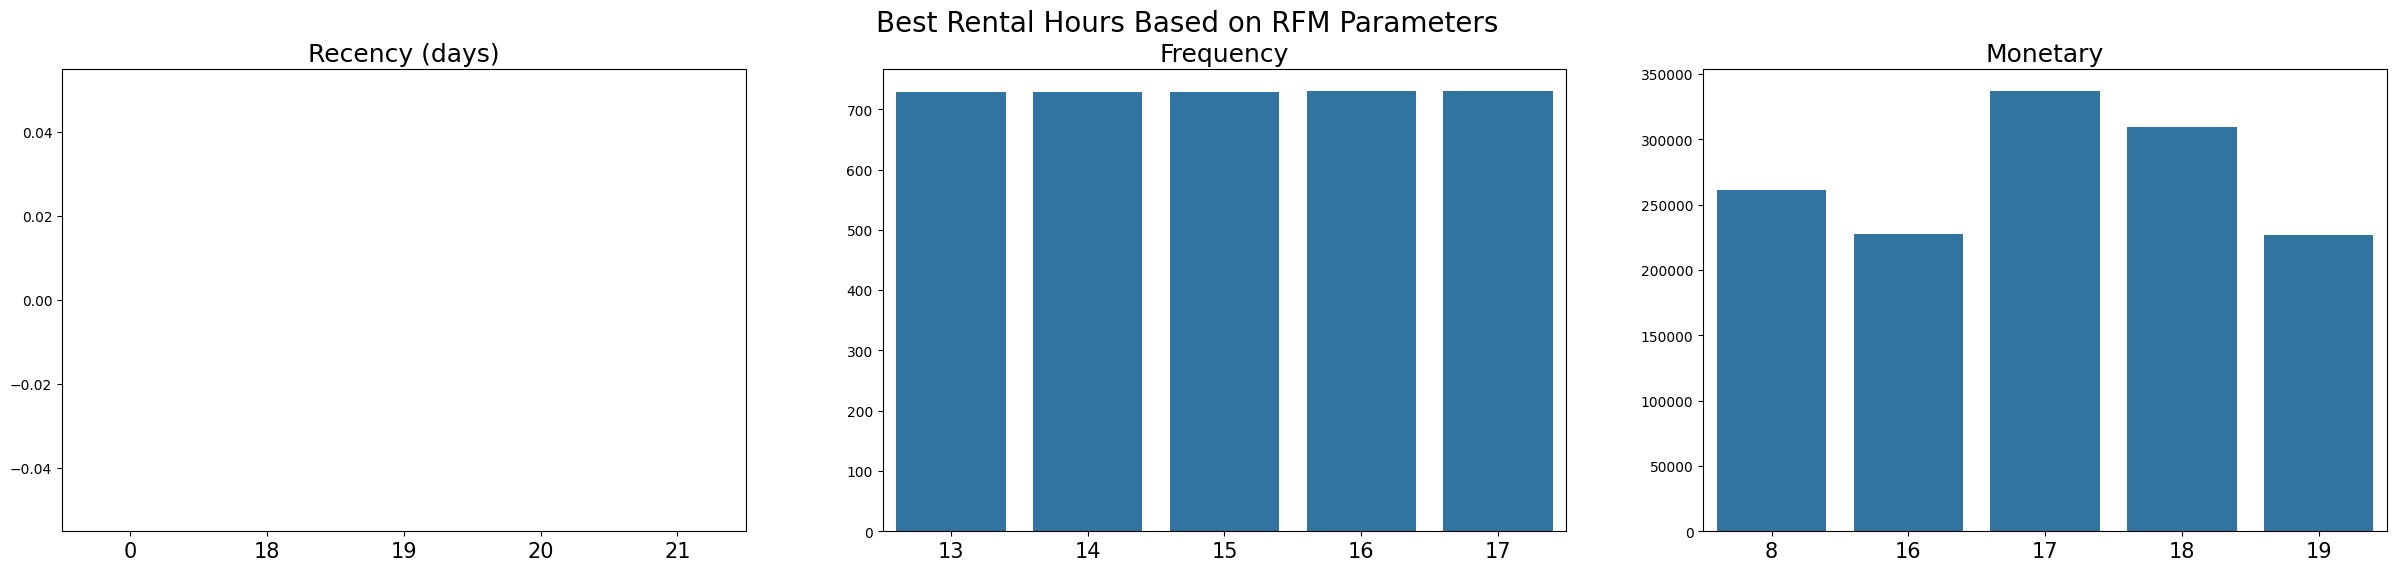

In [40]:
# Top 5 recency, frequency, and monetary hours
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
top_frequency = rfm_df.sort_values(by="order_count", ascending=False).head(5)
top_monetary = rfm_df.sort_values(by="revenue", ascending=False).head(5)

# Plotting bar plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Plot top recency
sns.barplot(
    data=top_recency,
    x="hour",
    y="recency",
    color='tab:blue',
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Plot top frequency
sns.barplot(
    data=top_frequency,
    x="hour",
    y="order_count",
    color='tab:blue',
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Plot top monetary
sns.barplot(
    data=top_monetary,
    x="hour",
    y="revenue",
    color='tab:blue',
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Add overall title
plt.suptitle("Best Rental Hours Based on RFM Parameters", fontsize=20)
plt.show()

Analisis lanjutan yang digunakan adalah analisis RFM (Recency, Frequency, Monetary) yang bertujuan untuk memahami perilaku pengguna. Hasil Analisis menunjukkan :
1. Recency:
- Kolom date digunakan untuk menghitung jumlah hari sejak transaksi terakhir pada jam tertentu.
- Top Recency: Visualisasi menunjukkan jam dengan Recency terendah (aktivitas terbaru).
2. Frequency:
- Kolom hour digunakan untuk menghitung jumlah transaksi (order_count) pada setiap jam.
- Top Frequency: Visualisasi menunjukkan jam dengan aktivitas terbanyak.
3. Monetary:
- Total kontribusi dihitung dari kolom casual_users dan registered_users.
- Top Monetary: Visualisasi menunjukkan jam dengan pendapatan terbesar.

## Conclusion

Berdasarkan visualisasi data, dapat disimpulkan bahwa:

- **Conclusion pertanyaan 1: Tren Peningkatan Jumlah Pengguna Sepeda**.
Dari tahun 2011 ke 2012, terdapat peningkatan signifikan dalam jumlah pengguna sepeda. Hal ini mencerminkan adanya tren positif dalam penggunaan layanan sepeda, yang kemungkinan dipengaruhi oleh faktor seperti meningkatnya kesadaran masyarakat terhadap moda transportasi ramah lingkungan atau adanya upaya promosi dari penyedia layanan.

- **Conclusion pertanyaan 2: Penggunaan Sepeda Berdasarkan Hari.**
Meskipun perbedaan tidak terlalu signifikan, pengguna sepeda lebih banyak pada hari kerja dibandingkan dengan akhir pekan. Hal ini mengindikasikan bahwa layanan sepeda lebih sering digunakan untuk aktivitas sehari-hari, seperti pergi bekerja atau sekolah, daripada untuk tujuan rekreasi pada akhir pekan.

- **Concluion pertanyaan 3: Musim dan Pola Penggunaan.**
Analisis berdasarkan musim menunjukkan bahwa musim gugur mencatat jumlah pengguna sepeda tertinggi, sementara musim semi mencatat jumlah pengguna terendah. Faktor ini mungkin dipengaruhi oleh kondisi cuaca atau kenyamanan penggunaan sepeda pada musim tertentu.

- **Conclusion pertanyaan 4: Pengaruh Keanggotaan terhadap Frekuensi Penggunaan.**
Data juga menunjukkan bahwa pengguna yang terdaftar sebagai anggota menggunakan sepeda lebih sering dibandingkan pengguna non-anggota. Hal ini menunjukkan bahwa program keanggotaan memiliki dampak positif terhadap peningkatan frekuensi penggunaan layanan sepeda.